Nama : ALEISYA ZAHARI SALAM

[LinkedIn](https://www.linkedin.com/in/aleisya-zahari-salam-5b8090222/)

In [1]:
#import
import zipfile, os

# Download file

In [2]:
!gdown 1Qi8IWjXnvrRFhFSFkx5OKGdYkaPzG5ue

Downloading...
From: https://drive.google.com/uc?id=1Qi8IWjXnvrRFhFSFkx5OKGdYkaPzG5ue
To: /content/rockpaperscissors.zip
100% 323M/323M [00:04<00:00, 68.5MB/s]


# Kriteria Submission

Berikut kriteria submission yang harus Anda penuhi:

- Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip.


- Dataset harus dibagi menjadi train set dan validation set.
Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).

- Harus mengimplementasikan augmentasi gambar.

- Menggunakan image data generator.

- Model harus menggunakan model sequential.

- Pelatihan model tidak melebihi waktu 30 menit.

- Program dikerjakan pada Google Colaboratory.
- Akurasi dari model minimal 85%.
- Dapat memprediksi gambar yang diunggah ke Colab seperti gambar di bawah.
202004302318257ec23b834046174a7d426680e488905e.png
-Manambahkan data diri (sesuai profil Dicoding) pada submission/project yang dikirimkan.

# Unzip Dataset

In [4]:
!unzip '/content/rockpaperscissors.zip'

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

# Membuat direktori

In [5]:
base_dir = '/content/rockpaperscissors'

# Preprocessing Image

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pembagian Data split train dan validation yaitu 60:40

datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

In [53]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes = ['paper', 'rock', 'scissors']
)

Found 1314 images belonging to 3 classes.


In [54]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=['paper', 'rock', 'scissors']
)

Found 874 images belonging to 3 classes.


# Pembuatan Model

In [57]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(3, activation='softmax')  # Urutan classes: paper, rock, scissors
])


In [58]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 17, 128)      

# Model Train

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.95):
      print("\nAkurasi telah mencapai 95%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [60]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=20,
                    steps_per_epoch = 15,
                    validation_data = validation_generator,
                    callbacks = [callbacks], verbose = 1)


Epoch 1/20
15/15 [==============================] - 52s 3s/step - loss: 1.5066 - accuracy: 0.3422 - val_loss: 1.0513 - val_accuracy: 0.4314
Epoch 2/20
15/15 [==============================] - 51s 3s/step - loss: 1.0008 - accuracy: 0.5562 - val_loss: 0.8326 - val_accuracy: 0.6522
Epoch 3/20
15/15 [==============================] - 57s 4s/step - loss: 0.8783 - accuracy: 0.5978 - val_loss: 0.7269 - val_accuracy: 0.7277
Epoch 4/20
15/15 [==============================] - 54s 4s/step - loss: 0.7054 - accuracy: 0.6979 - val_loss: 0.5734 - val_accuracy: 0.7815
Epoch 5/20
15/15 [==============================] - 51s 3s/step - loss: 0.4985 - accuracy: 0.8167 - val_loss: 0.4420 - val_accuracy: 0.8513
Epoch 6/20
15/15 [==============================] - 51s 4s/step - loss: 0.3727 - accuracy: 0.8667 - val_loss: 0.3483 - val_accuracy: 0.8673
Epoch 7/20
15/15 [==============================] - 69s 5s/step - loss: 0.4279 - accuracy: 0.8178 - val_loss: 0.5719 - val_accuracy: 0.7803
Epoch 8/20
15/15 [==

# Evaluasi

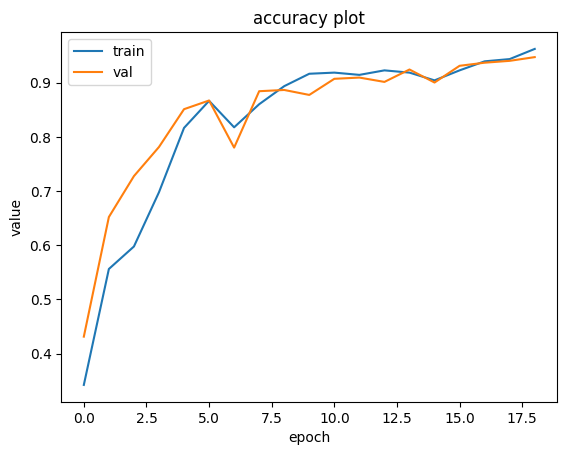

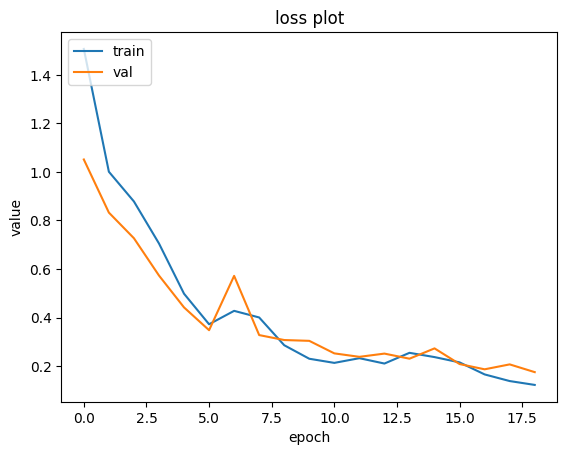

In [61]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

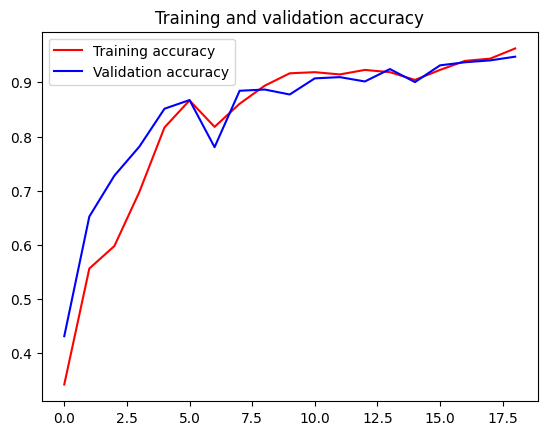

<Figure size 640x480 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Testing

Saving paper.png to paper (8).png
1/1 [==============================] - 0s 68ms/step
paper (8).png
Raw Predictions: [9.9959654e-01 8.5645930e-05 3.1780865e-04]
Paper


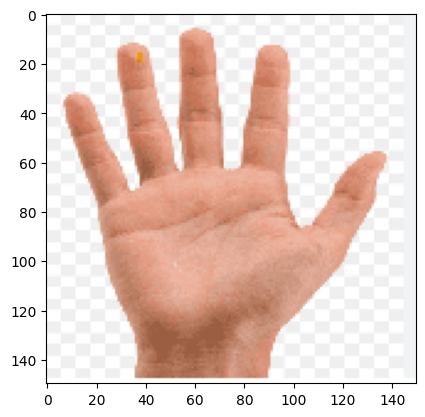

In [64]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)[0]

    print(fn)
    print("Raw Predictions:", classes)

    predicted_class_index = np.argmax(classes)

    if predicted_class_index == 0:
        print('Paper')
    elif predicted_class_index == 1:
        print('Rock')
    else:
        print('Scissors')
